# Matplotlib Part 2: Intermediate Techniques

This notebook builds on the basics, covering how to create more complex figures with multiple plots, shared axes, date formatting, and detailed customizations like annotations and ticks.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Multiple Plots in One Figure (Subplots)

The `plt.subplots()` function is the most common way to create a grid of subplots.

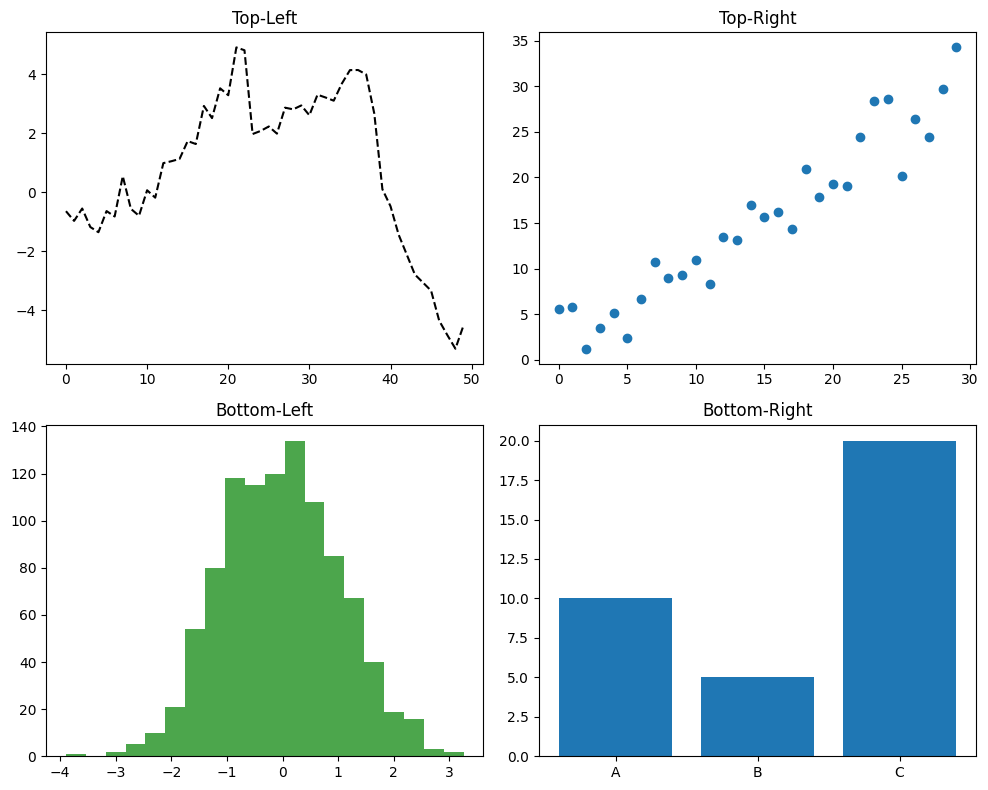

In [2]:
# Create a 2x2 grid of subplots
# `fig` is the entire figure, `axs` is a 2D NumPy array of the axes objects
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Access each subplot by its index
axs[0, 0].plot(np.random.randn(50).cumsum(), 'k--')
axs[0, 0].set_title('Top-Left')

axs[0, 1].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
axs[0, 1].set_title('Top-Right')

axs[1, 0].hist(np.random.randn(1000), bins=20, color='g', alpha=0.7)
axs[1, 0].set_title('Bottom-Left')

axs[1, 1].bar(['A', 'B', 'C'], [10, 5, 20])
axs[1, 1].set_title('Bottom-Right')

plt.tight_layout() # Adjusts subplot params for a tight layout
plt.show()

## Twin Axes

Twin axes allow you to show two different scales on the same plot, which is useful for comparing two variables with different units.

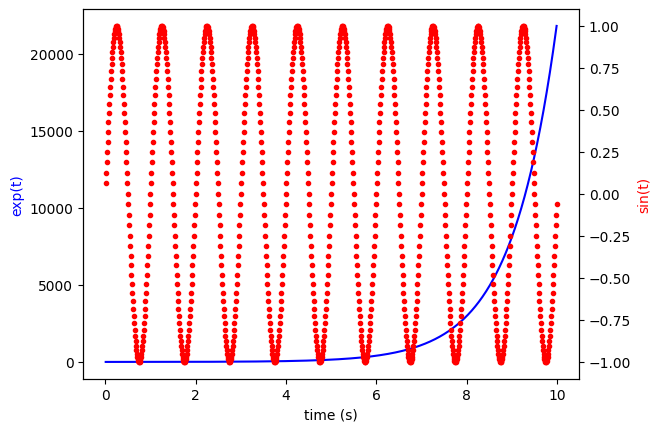

In [3]:
fig, ax1 = plt.subplots()

t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp(t)', color='b')

# Create a second axes that shares the same x-axis
ax2 = ax1.twinx()
s2 = np.sin(2 * np.pi * t)
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('sin(t)', color='r')

plt.show()

## Working with Dates and Time Series

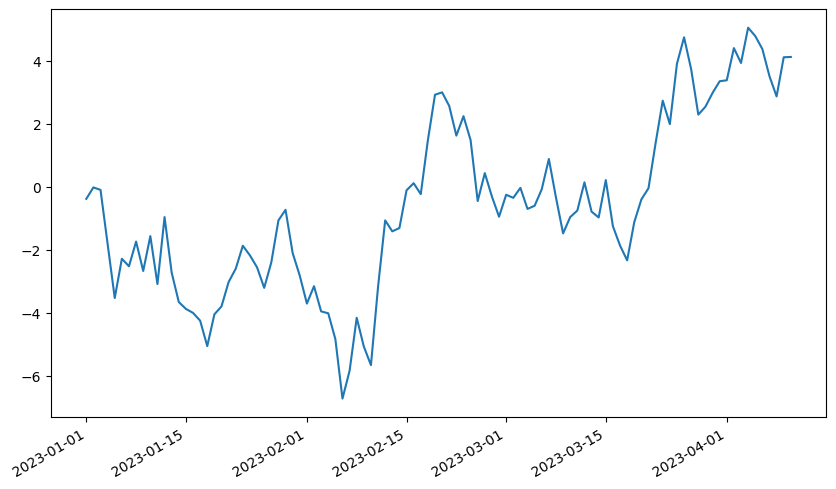

In [4]:
# Create a sample time series with Pandas
dates = pd.date_range(start='2023-01-01', periods=100)
data = np.random.randn(100).cumsum()
ts = pd.Series(data, index=dates)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ts.index, ts.values)

# Matplotlib automatically formats the dates on the x-axis
fig.autofmt_xdate() # For better date formatting
plt.show()

## Customizing Ticks and Tick Labels

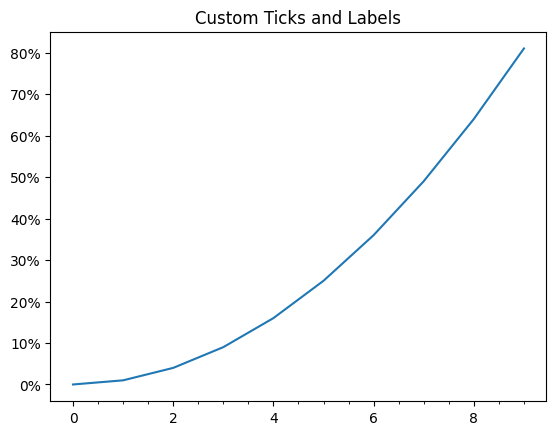

In [5]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

fig, ax = plt.subplots()
ax.plot(np.arange(10), np.arange(10)**2)

# Set major and minor ticks
ax.xaxis.set_major_locator(MultipleLocator(2)) # Major tick every 2 units
ax.xaxis.set_minor_locator(MultipleLocator(0.5)) # Minor tick every 0.5 units

# Format tick labels
ax.yaxis.set_major_formatter(FormatStrFormatter('%d%%')) # Add a percent sign

ax.set_title('Custom Ticks and Labels')
plt.show()

## Adding Annotations and Text

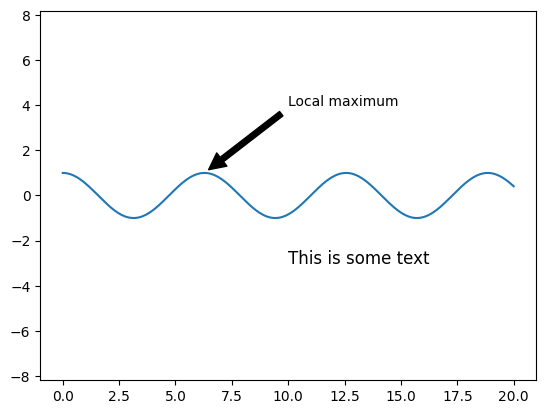

In [6]:
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

# Add an arrowed annotation
ax.annotate('Local maximum', xy=(2 * np.pi, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Add text at a specific position
ax.text(10, -3, 'This is some text', fontsize=12)

plt.show()

## Grid Lines and Spines Customization

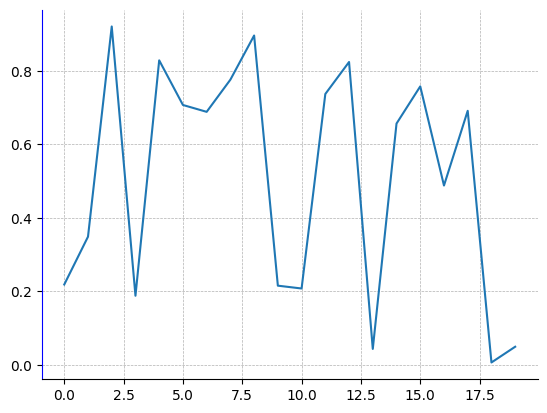

In [7]:
fig, ax = plt.subplots()
ax.plot(np.random.rand(20))

# Customize grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize spines (the plot border)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('blue')

plt.show()

## Saving Figures

Figure saved in various formats.


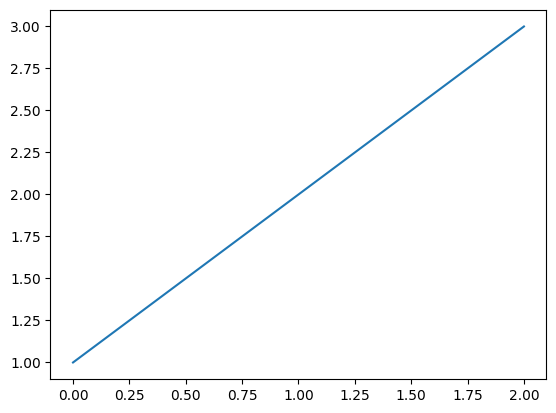

In [8]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3])

# Save as PNG (raster format)
fig.savefig('my_plot.png', dpi=300)

# Save as SVG (vector format)
fig.savefig('my_plot.svg')

print("Figure saved in various formats.")